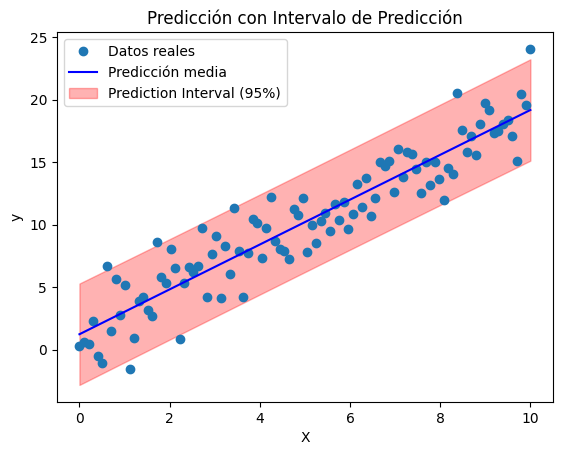

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Datos simulados
X = np.linspace(0, 10, 100)
y = 2 * X + np.random.normal(0, 2, size=len(X))

# Agregar constante
X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()

# Predicciones con intervalos
pred = model.get_prediction(X_with_const)
pred_summary = pred.summary_frame(alpha=0.05)

# Gráfica
plt.plot(X, y, 'o', label="Datos reales")
plt.plot(X, pred_summary["mean"], 'b-', label="Predicción media")
plt.fill_between(X, 
                 pred_summary["obs_ci_lower"], 
                 pred_summary["obs_ci_upper"], 
                 color='red', alpha=0.3, label="Prediction Interval (95%)")

plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Predicción con Intervalo de Predicción")
plt.show()


x: mean=100.776 stdv=19.620
y: mean=151.050 stdv=22.358


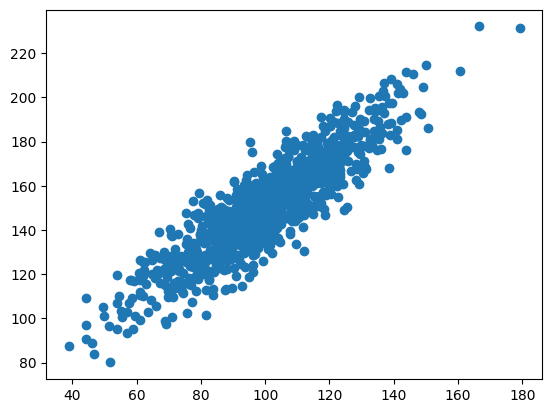

In [1]:
# generate related variables
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot

# seed random number generator
seed(1)

# prepare data
x = 20 * randn(1000) + 100
y = x + (10 * randn(1000) + 50) 

# summarize
print('x: mean=%.3f stdv=%.3f' % (mean(x), std(x)))
print('y: mean=%.3f stdv=%.3f' % (mean(y), std(y)))

# plot
pyplot.scatter(x, y)
pyplot.show()

b0 = 1.011, b1 = 49.117


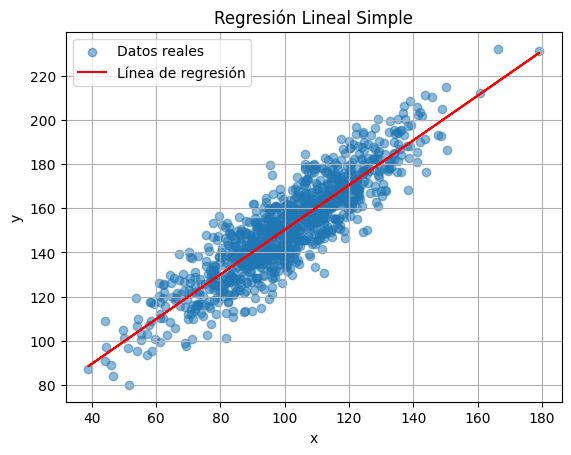

In [3]:
# Simple linear regression model
from numpy.random import randn, seed
from scipy.stats import linregress
from matplotlib import pyplot as plt

# Seed random number generator
seed(1)

# Prepare data
x = 20 * randn(1000) + 100
y = x + (10 * randn(1000) + 50)

# Fit linear regression model
b1, b0, r_value, p_value, std_err = linregress(x, y)
print('b0 = %.3f, b1 = %.3f' % (b1, b0))

# Make prediction
yhat = b0 + b1 * x

# Plot data and predictions
plt.scatter(x, y, alpha=0.5, label='Datos reales')
plt.plot(x, yhat, color='r', label='Línea de regresión')
plt.title('Regresión Lineal Simple')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


Prediction Interval: 20.204
95% likelihood that the true value is between 162.920 and 203.328
True value: 183.124


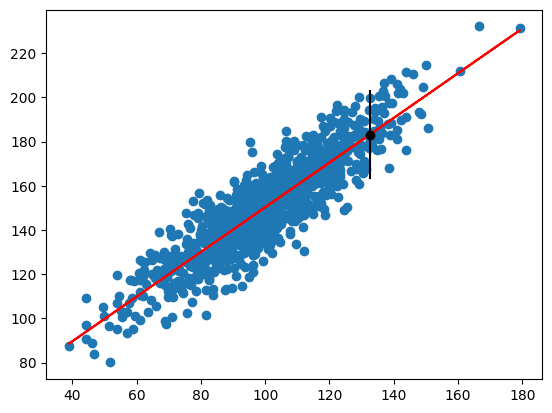

In [26]:
# linear regression prediction with prediction interval
from numpy.random import randn
from numpy.random import seed
from numpy import sqrt
from numpy import sum as arraysum
from scipy.stats import linregress
from matplotlib import pyplot

# seed random number generator
seed(1)

# prepare data
x = 20 * randn(1000) + 100
y = x + (10 * randn(1000) + 50)
# fit linear regression model
b1, b0, r_value, p_value, std_err = linregress(x, y)

# make predictions
yhat = b0 + b1 * x

# define new input, expected value and prediction
x_in = x[0]
y_out = y[0]
yhat_out = yhat[0]

# estimate stdev of yhat
sum_errs = arraysum((y- yhat)**2)
stdev = sqrt(1/(len(y)-2) * sum_errs)

# calculate prediction interval
interval = 1.96 * stdev
print('Prediction Interval: %.3f' % interval)
lower, upper = yhat_out- interval, yhat_out + interval
print('95%% likelihood that the true value is between %.3f and %.3f' % (lower, upper))
print('True value: %.3f' % yhat_out)

# plot dataset and prediction with interval
pyplot.scatter(x, y)
pyplot.plot(x, yhat, color='red')
pyplot.errorbar(x_in, yhat_out, yerr=interval, color='black', fmt='o')
pyplot.show()